In [ ]:
#By using ImageGenerator,We can do a lot of data augmentation and process the image before feeding it to the data generator.
#Because of time contraints ,I could only rescale the image which is necessary to achieve normalization and 
#feed the data to the model

from keras_preprocessing.image import ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data


In [3]:
#Rescaling the image and other necessary model inputs
batch_size = 10
epochs = 5
IMG_HEIGHT = 600
IMG_WIDTH = 600

In [10]:
#Creating Data generator using the above image generator and giving the source location for the training and testing folders

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='F:/IMP.DATA/Task/Watermark_train_data',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='F:/IMP.DATA/Task/Watermark_test_data',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 143 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


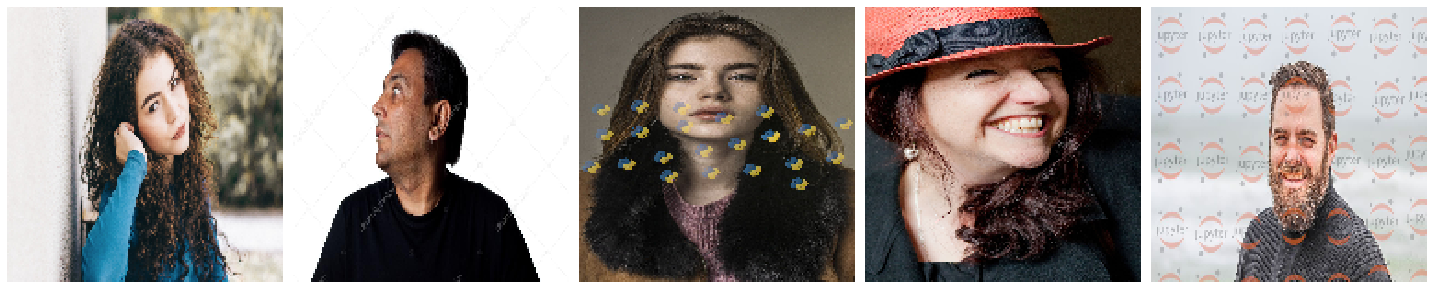

In [40]:
#Visualizing the training images
sample_training_images, _ = next(train_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])


In [4]:
#Create the Model.The model consists of three convolution blocks with a max pool layer in each of them. 
#There's a fully connected layer with 512 units on top of it that is activated by a relu activation function. 
#The model outputs class probabilities based on binary classification by the sigmoid activation function 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
#View all the layers of the network using the model's summary method:

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 600, 600, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 300, 300, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 300, 300, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 360000)           

In [9]:
#Train the model using the fit_generator

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=142 // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=132 // batch_size
)

Epoch 1/5
10/10 [==============================] - 44s 4s/step - loss: 8.0929 - accuracy: 0.4301 - val_loss: 7.8200 - val_accuracy: 0.4900
Epoch 2/5
10/10 [==============================] - 47s 5s/step - loss: 8.8933 - accuracy: 0.4200 - val_loss: 7.8200 - val_accuracy: 0.4900
Epoch 3/5
10/10 [==============================] - 45s 5s/step - loss: 8.5075 - accuracy: 0.4301 - val_loss: 7.8200 - val_accuracy: 0.4900
Epoch 4/5
10/10 [==============================] - 45s 4s/step - loss: 8.5866 - accuracy: 0.4400 - val_loss: 7.8200 - val_accuracy: 0.4900
Epoch 5/5
10/10 [==============================] - 44s 4s/step - loss: 7.7191 - accuracy: 0.4624 - val_loss: 7.8200 - val_accuracy: 0.4900
